# **Project 4 for Fuzzy System** 

> Instructor: Dr. Hao Ying     
> **Solutions given by Yuqi Wang**   
> Email: he1173@wayne.edu     
> Date: 02.04.2022   

## Descriptions
- Source codes will be uploaded and updated to [Github repo](https://github.com/BoomAmplifier/Fuzzy_HW).     
- *Matlab* is licenced by WSU.    
- *Jupyter Notebook* and *python3* are also used in the document.

## Project 3      
The system function is 
$$\begin{equation}
f(x,y)=3(1-x)^2e^{-x^2-(y+1)^2}-10(\frac{x}{5}-x^3-y^5)e^{-x^2-y^2}-\frac{1}{3}e^{-(x+1)^2-y^2}
\end{equation}$$   
where $x,y\in[-3,3]$.

## Solutions:  
- 1)A 3D plot of $f(x,y)$ by using Matlab code in the file `YQ_FS_P4.mlx` is shown as below:

<div>
<center>
    <img src=".\fig\p4-1.svg" style="width: 50%;height: 50%"/>
</center>
</div> 

A Python3 version code for ploting $f(x,y)$ is also attached below.

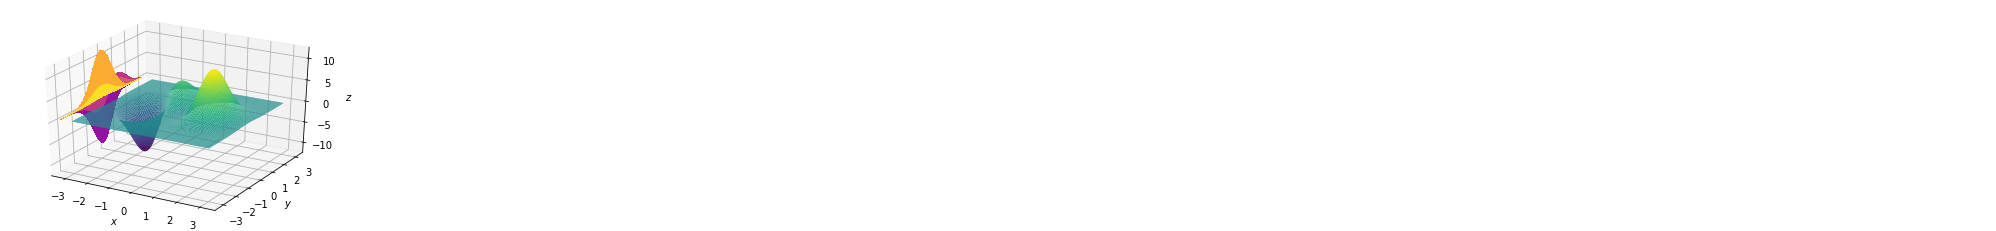

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

from mpl_toolkits import mplot3d
import matplotlib.cm as cm
%matplotlib inline

#creating grid
thta =3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
x = np.linspace(-thta,thta,100)
y = np.linspace(-thta,thta,100)
x,y = np.meshgrid(x,y)
z = 3*np.square(1-x)*np.exp(-np.square(x)-np.square(1-y))\
    -10*(x/5-np.power(x,3)-np.power(x,5))*np.exp(-np.square(x)-np.square(y))\
    -1/3*np.exp(-np.square(x+1)-np.square(y))
    
ax.plot_surface(x, y, z,alpha=1, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

cset = ax.contourf(x, y, z, zdir='x', offset=-3.5, cmap=cm.plasma)
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim(-3.5,3.5)
ax.set_ylim(-3.5,3.5)
ax.set_zlim(-12,12)
plt.show()


- 2&3) Maximums and minimums, global and local     
Optimization Toolbox is applied to find global max and min, local maxs and mins.               

   - STEP1: build a function for $f(x,y)$ which is located in the file `p3f.m`. 

>```
function f = p3f(x,y)
    f = 3.*(1-x).^2.*exp((-x.^2-(y+1).^2))-10.*(x/5-x.^3-y.^5).*exp((-x.^2-y.^2))-1/3.*exp((-(x+1).^2-y.^2));
end
>```

   - STEP2: use `fmincon` to search mins and maxs   

>```
problem = createOptimProblem('fmincon',...
    'objective',@(x)-p3f(x(1),x(2)),...
    'x0',x0,'lb',lb,'ub',ub,...
    'options',...
optimoptions(@fmincon,'Algorithm','sqp','Display','off'));
>```                                                                                                   
   
   - STEP3: use `GlobalSearch` to search global min
   
>```
gs = GlobalSearch('Display','iter');
rng(14,'twister') % for reproducibility
[x,fval] = run(gs,problem)
>```  


   - STEP4: use `MultiStart` to search local mins
    
>```
ms = MultiStart('StartPointsToRun','bounds')
[x,fval,eflag,output,manymins] = run(ms,problem,500)
>```

   - STEP5: change $f(x,y)$ to $-f(x,y)$ to search the minimums again which are the maximums for $f(x,y)$

**Results:**     
- Global   
Minimum: $[x,y,z]=[0.2283, -1.6255, -6.5511]$    
Maxmum: $[x,y,z]=[-0.0093, 1.5814, 8.1062]$      
- Local    
The number of local minimums found by the code decribed above is **6**. 
$$[x,y,z]_1=[0.2283, -1.6255, -6.5511]$$
$$[x,y,z]_2=[-1.3474, 0.2045, -3.0498]$$
$$[x,y,z]_3=[0.2964, 0.3202, -0.0649]$$
$$[x,y,z]_4=[-3, 3, 3.2235\times 10^{-5}]$$
$$[x,y,z]_5=[3, 3, 4.1030\times 10^{-5}]$$
$$[x,y,z]_6=[-3, -3, 6.6713\times 10^{-5}]$$

The number of local maximums found by the code decribed above is **5**. 
$$[x,y,z]_1=[-0.0093, 1.5814, 8.1062]$$
$$[x,y,z]_2=[-0.4600, -0.6292, 3.7766]$$
$$[x,y,z]_3=[1.2857, -0.0048, 3.5925]$$
$$[x,y,z]_4=[3, -3, -5.8642\times 10^{-6}]$$
$$[x,y,z]_5=[3.0000, -2.9044, -8.8831\times 10^{-6}]$$
